In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import KBinsDiscretizer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
file_path = '/pima-indians-diabetes.data.csv'
column_names = ['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1']
df = pd.read_csv(file_path, header=None, names=column_names)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
df_binned = pd.DataFrame(discretizer.fit_transform(df.iloc[:, :-1]), columns=column_names[:-1])
df_binned['1'] = df['1']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [32]:
basket = df_binned.applymap(lambda x: True if x else False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-32-da335b9e7316>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = df_binned.applymap(lambda x: True if x else False)


In [33]:
frequent_itemsets = apriori(basket, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
rules = rules[(rules['support'] >= 0.1) & (rules['confidence'] >= 0.5) & (rules['lift'] >= 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
print(rules)


        antecedents          consequents  antecedent support  \
1               (6)                 (72)            0.359375   
4              (50)                  (6)            0.351562   
5               (6)                 (50)            0.359375   
8           (0.627)                (148)            0.221354   
10              (1)                (148)            0.348958   
...             ...                  ...                 ...   
1155     (1, 72, 6)      (50, 33.6, 148)            0.165365   
1159  (1, 50, 33.6)         (72, 148, 6)            0.177083   
1161    (1, 50, 72)       (33.6, 148, 6)            0.171875   
1167         (1, 6)  (72, 50, 33.6, 148)            0.171875   
1172        (1, 50)   (72, 33.6, 148, 6)            0.178385   

      consequent support   support  confidence      lift  leverage  \
1               0.950521  0.345052    0.960145  1.010125  0.003459   
4               0.359375  0.256510    0.729630  2.030274  0.130168   
5               0.351

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


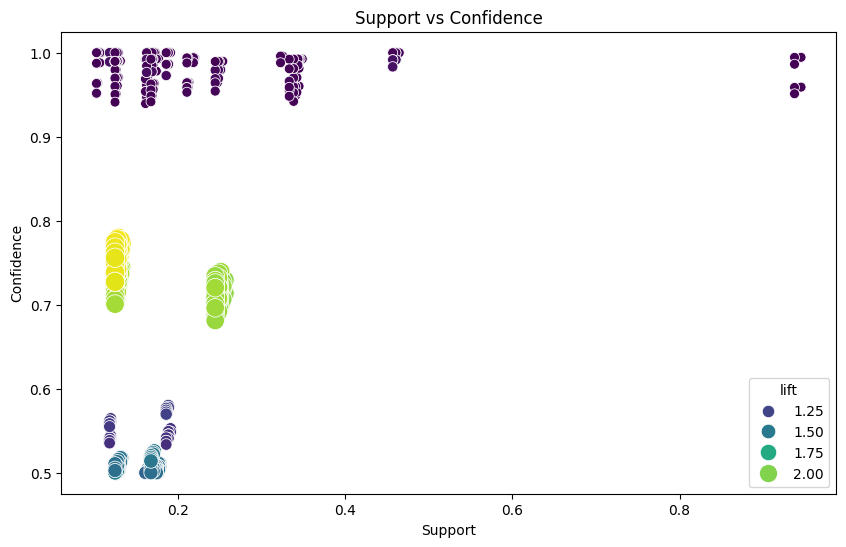

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='confidence', hue='lift', size='lift', palette='viridis', sizes=(50, 200))
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-38-8e02146385ba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lift', y='antecedents', data=top_lift, palette='viridis')


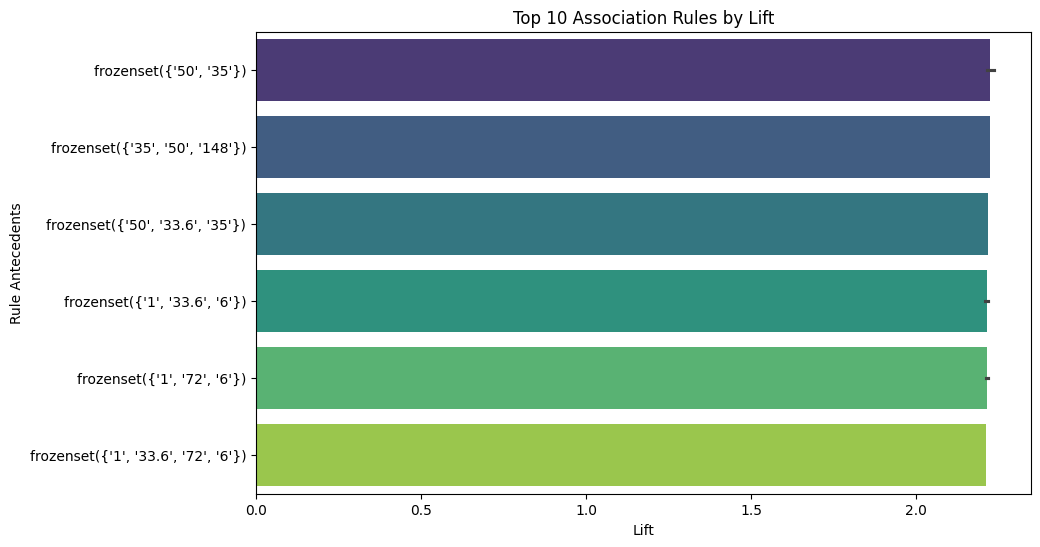

In [38]:
plt.figure(figsize=(10, 6))
top_lift = rules.sort_values('lift', ascending=False).head(10)
sns.barplot(x='lift', y='antecedents', data=top_lift, palette='viridis')
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rule Antecedents')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


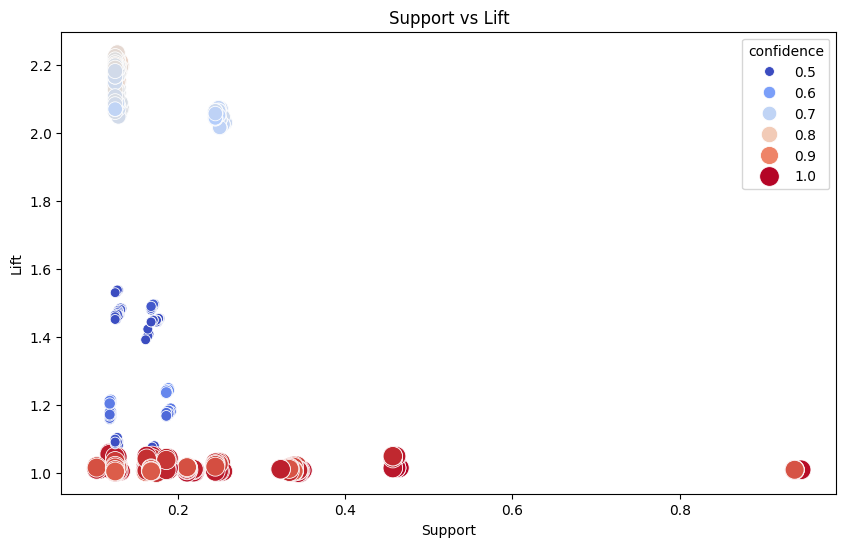

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='lift', hue='confidence', size='confidence', palette='coolwarm', sizes=(50, 200))
plt.title('Support vs Lift')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


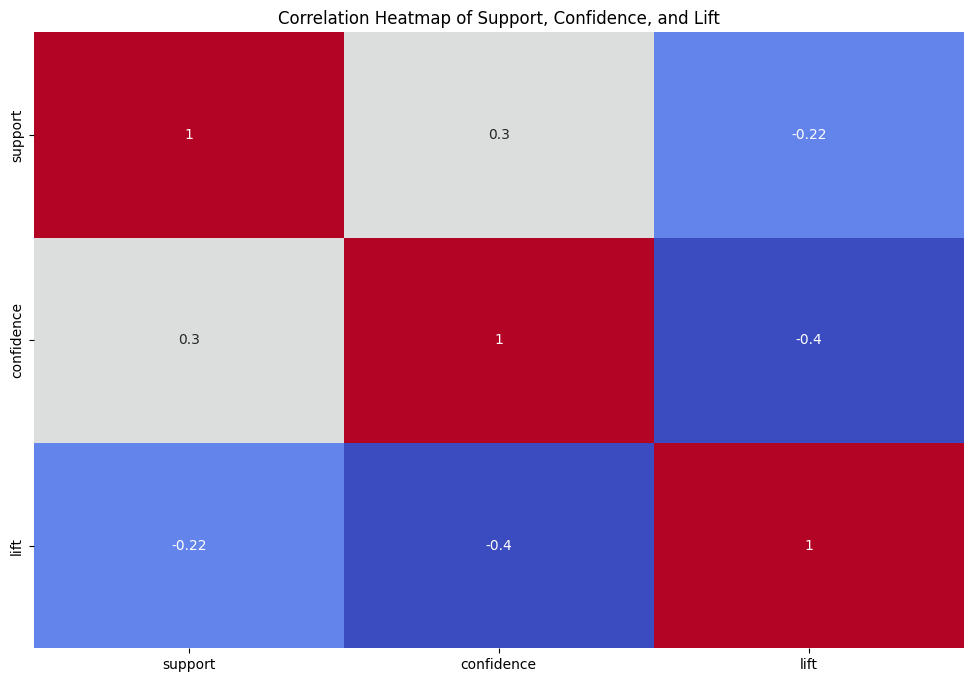

In [40]:
plt.figure(figsize=(12, 8))
sns.heatmap(rules[['support', 'confidence', 'lift']].corr(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation Heatmap of Support, Confidence, and Lift')
plt.show()

In [42]:
print(rules)

        antecedents          consequents  antecedent support  \
1               (6)                 (72)            0.359375   
4              (50)                  (6)            0.351562   
5               (6)                 (50)            0.359375   
8           (0.627)                (148)            0.221354   
10              (1)                (148)            0.348958   
...             ...                  ...                 ...   
1155     (1, 72, 6)      (50, 33.6, 148)            0.165365   
1159  (1, 50, 33.6)         (72, 148, 6)            0.177083   
1161    (1, 50, 72)       (33.6, 148, 6)            0.171875   
1167         (1, 6)  (72, 50, 33.6, 148)            0.171875   
1172        (1, 50)   (72, 33.6, 148, 6)            0.178385   

      consequent support   support  confidence      lift  leverage  \
1               0.950521  0.345052    0.960145  1.010125  0.003459   
4               0.359375  0.256510    0.729630  2.030274  0.130168   
5               0.351

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
